In [1]:
# import sys
# !{sys.executable} -m pip install yellowbrick

import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import pickle5 as pickle
pd.set_option('display.max_columns', None)

2023-05-04 07:07:00.378466: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-04 07:07:00.434023: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 07:07:01.334517: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [34]:
parameterization = '4'
df = pd.read_pickle(
    'model_weights/architecture_weights_4.pkl')

In [35]:
df

,architecture weight,layer architecture,std,IQR,var
0,565.162310,3-2,23.773143,0.605386,565.162310
1,511.341265,4-2,22.612856,0.605386,511.341265
2,583.430069,5-2,24.154297,0.605386,583.430069
3,566.664442,6-2,23.804715,0.605386,566.664442
4,553.565937,7-2,23.527982,0.605386,553.565937
...,...,...,...,...,...
156,641.681949,16-15,25.331442,0.605386,641.681949
157,635.160228,17-15,25.202385,0.605386,635.160228
158,622.747878,18-15,24.954917,0.605386,622.747878
159,632.160116,19-15,25.142795,0.605386,632.160116


# Total Glacier Uncertainty $\sigma^{2}_{\mu_{l}} = \hat{\sigma}^{2}_{\mu_{l}}  + \tilde{\sigma}^{2}_{\mu_{l}} + {E}^{2}_{GD}$

Total glacier uncertainty is considered a linear sum of three separate uncertainties.
$\sigma^{2}_{\mu_{l}} = \hat{\sigma}^{2}_{\mu_{l}} + \tilde{\sigma}^{2}_{\mu} + \prime{\sigma}^{2}_{\mu_{l}}$

## 1. Bootstrap uncertainty $\hat{\sigma}^{2}_{\mu_{l}} $

$\hat{\sigma}^{2}_{il} =  \frac{1}{N_{x}} \sum_{k}^{N_x} \left( \hat{h}_{ikl} - \frac{1}{N_{x}} \sum_{k}^{N_{x}} \hat{h}_{ikl}  \right)^{2} \quad \rightarrow \quad \hat{\sigma}^{2}_{\mu_{l}} = \frac{1} {\sum_{i}^{N_{m} }\frac{1}{\hat{\sigma}^{2}_{il}}}$


## 2. Standard Residual Error $\tilde{\sigma}^{2}_{\mu_{l}}$

$\tilde{\sigma}^{2}_{i} = \left( \frac{IQR\left(d_{ijk}\right)}{1.5} \hat{H}_{il}\right)^{2} \quad \rightarrow \quad \tilde{\sigma}^{2}_{\mu_{l}} = \frac{1} {\sum_{i}^{N_{m} }\frac{1}{\tilde{\sigma}^{2}_{il}}}$


## 3. Graybill-Deal Model Mean Absolute Error $\hat{E}_{GD}$

${E}_{GD} = \sum_{i}^{N_m} \frac{N_{m}}{\sigma_{E_{i}}^{2}} \bar{E}_{i} \big{/} \sum_{i}^{N_m} \frac{N_{m}}{\sigma_{E_{i}}^{2}} = 16.321 m$

$\sigma_{E_{i}}^{2} = \frac{1}{N_{x}} \sum_{k}^{N_{x}}\left(\hat{E}_{ik} -  \bar{E}_{i}\right)^{2}$

$\bar{E}_{i} = \frac{1}{N_{x}} \sum_{k}^{N_{x}}\hat{E}_{ik}$

In [2]:
df = gl.load_notebook_data(
    parameterization = '4',
#     pth = '/data/fast1/glacierml/data/'
)
df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,Composite Deviation Uncertainty 3,Weighted Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3)
0,RGI60-01.00001,42.329163,40.829075,17.774538,42.256065,5.330348,0.000619,0.022858,1.758990,92.087355,293.625370,266.375041,0.015212,17.147952,17.373273,0.977839,1.403805e-24,22.393700,4025.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,19.988910,0.953100,1.411381e-12,22.598288,1.490189,-0.404481,0.007196
1,RGI60-01.00002,65.017494,64.454842,12.893505,64.860148,-2.502357,0.000401,0.011739,4.234247,207.829045,687.497544,266.375041,0.036192,12.887887,12.357562,0.991608,1.123248e-14,16.607788,4025.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,29.413269,0.980514,1.595224e-09,31.332405,3.074196,0.050484,0.016413
2,RGI60-01.00003,64.667038,63.936592,13.213099,64.513577,-0.044015,-0.005770,0.012367,4.189037,206.599969,680.159125,266.375041,0.108705,13.328801,12.734462,0.990523,9.140342e-16,17.279205,4025.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,31.862368,0.944144,9.216613e-31,35.054910,2.878639,-0.390670,0.053688
3,RGI60-01.00004,70.265610,69.803032,13.985704,70.100972,-9.131564,0.001338,0.013813,4.949596,248.591953,802.867014,266.375041,0.258042,13.597259,13.528556,0.993316,9.428541e-13,17.838818,4025.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,45.454704,0.969001,8.057077e-34,45.209550,6.697096,0.072549,0.167319
4,RGI60-01.00005,70.848854,70.529549,13.393655,70.678780,-9.292901,0.001424,0.012593,5.032147,250.963429,816.145517,266.375041,0.181857,12.459785,12.795735,0.994704,6.127921e-11,16.795216,4025.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,43.040817,0.977176,3.500081e-25,43.682045,6.024213,0.328906,0.110744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,35.898376,35.064503,9.786620,35.872132,11.882072,0.001889,0.006953,1.283086,67.305062,210.665100,266.375041,0.001507,9.634790,10.937231,0.991746,1.570463e-14,13.292896,4025.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.593311,0.923319,4.533989e-04,13.539223,1.212544,-1.011952,0.000529
216497,RGI60-19.02749,45.766666,46.015816,6.605012,45.748139,5.185685,0.000378,0.003086,2.110583,118.012226,341.351353,266.375041,0.025939,6.097812,6.066629,0.987532,2.212324e-18,7.905735,4025.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,20.532068,0.972606,4.733442e-12,19.437310,2.341599,0.356173,0.011642
216498,RGI60-19.02750,68.989281,70.057808,7.536087,68.908852,-9.442056,0.001228,0.003722,4.802264,263.849853,774.150322,266.375041,0.283767,5.158432,6.256610,0.915215,8.477856e-43,7.364868,4025.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,55.923466,0.977032,2.709829e-31,58.010944,9.158872,0.279736,0.230293
216499,RGI60-19.02751,105.089897,108.702805,14.895259,104.840490,-32.054810,0.013983,0.011478,11.050330,597.871706,1796.272983,266.375041,0.001153,6.881970,9.885336,0.719737,0.000000e+00,10.367699,4025.0,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,10.181019,0.954263,5.273163e-01,10.175133,0.199121,0.277144,0.000112


In [22]:
np.sqrt(df['Weighted Deviation Uncertainty'])

0         17.135500
1         26.220174
2         26.079861
3         28.334908
4         28.568261
            ...    
216496    14.514307
216497    18.475696
216498    27.823557
216499    42.382461
216500    25.160099
Name: Weighted Deviation Uncertainty, Length: 216501, dtype: float64

In [21]:
df['VolSTD'] = df['Area'] * (np.sqrt(df['Weighted Deviation Uncertainty']) / 1e3)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.187 +/- 3.73 * 10^3 km^3, 2.822% uncertainty


In [20]:
df['VolSTD'] = df['Area'] * np.sqrt(92.6) / 1e3

# (np.sqrt(df['Weighted Deviation Uncertainty']) / 1e3)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)


print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 8000693030.277402 +/- 0.229 * 10^3 km^3, 0.0% uncertainty


In [27]:
df['VolSTD'] = df['Area'] * (df['Thickness Std Dev'] / 1e3)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.187 +/- 1.899 * 10^3 km^3, 1.437% uncertainty


In [4]:
dev_vol_var = (df['Area'] * np.sqrt(df['Composite Deviation Uncertainty']) / 1e3)**2
bootstrap_vol_var = (df['Area'] * np.sqrt(df['Bootstrap Uncertainty']) / 1e3)**2
MAE_vol_var = (df['Area'] * np.sqrt(df['MAE Uncertainty']) / 1e3)**2

df['VolSTD'] = np.sqrt(
#     dev_vol_var + 
    bootstrap_vol_var 
#     MAE_vol_var
)

df['VolUnc'] = df['VolSTD'] / df['Weighted Volume (km3)'] * 100

glac_sum = np.round(sum(df['Weighted Volume (km3)']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.187 +/- 0.013 * 10^3 km^3, 0.01% uncertainty


# Applying the Residual Correction Factor

In [5]:
df

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),VolSTD,VolUnc
0,RGI60-01.00001,42.329163,40.829075,17.774538,42.256065,5.330348,0.000619,0.022858,0.105064,266.375041,0.015212,17.147952,17.373273,0.977839,1.403818e-24,22.393700,4025.0,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,19.988910,0.953100,1.411381e-12,22.598288,1.490189,-0.404481,0.007196,0.000054,0.357790
1,RGI60-01.00002,65.017494,64.454842,12.893505,64.860148,-2.502357,0.000401,0.011739,0.162447,266.375041,0.036192,12.887887,12.357562,0.991609,1.124679e-14,16.607788,4025.0,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,29.413269,0.980514,1.595224e-09,31.332405,3.074196,0.050484,0.016413,0.000060,0.167049
2,RGI60-01.00003,64.667038,63.936592,13.213099,64.513577,-0.044015,-0.005770,0.012367,0.161574,266.375041,0.108705,13.328801,12.734462,0.990523,9.137704e-16,17.279205,4025.0,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,31.862368,0.944144,9.216613e-31,35.054910,2.878639,-0.390670,0.053688,0.000187,0.172379
3,RGI60-01.00004,70.265610,69.803032,13.985704,70.100972,-9.131564,0.001338,0.013813,0.175608,266.375041,0.258042,13.597259,13.528556,0.993317,9.464015e-13,17.838818,4025.0,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,45.454704,0.969001,8.057077e-34,45.209550,6.697096,0.072549,0.167319,0.000433,0.167654
4,RGI60-01.00005,70.848854,70.529549,13.393655,70.678780,-9.292901,0.001424,0.012593,0.177068,266.375041,0.181857,12.459785,12.795735,0.994704,6.132926e-11,16.795216,4025.0,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,43.040817,0.977176,3.500081e-25,43.682045,6.024213,0.328906,0.110744,0.000289,0.158771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,35.898376,35.064503,9.786620,35.872132,11.882072,0.001889,0.006953,0.089518,266.375041,0.001507,9.634790,10.937231,0.991746,1.569561e-14,13.292896,4025.0,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,12.593311,0.923319,4.533989e-04,13.539223,1.212544,-1.011952,0.000529,0.000004,0.232454
216497,RGI60-19.02749,45.766666,46.015816,6.605012,45.748139,5.185685,0.000378,0.003086,0.114574,266.375041,0.025939,6.097812,6.066629,0.987531,2.209954e-18,7.905735,4025.0,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,20.532068,0.972606,4.733442e-12,19.437310,2.341599,0.356173,0.011642,0.000031,0.121428
216498,RGI60-19.02750,68.989281,70.057808,7.536087,68.908852,-9.442056,0.001228,0.003722,0.172787,266.375041,0.283767,5.158432,6.256610,0.915216,8.491869e-43,7.364868,4025.0,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,55.923466,0.977032,2.709829e-31,58.010944,9.158872,0.279736,0.230293,0.000251,0.088540
216499,RGI60-19.02751,105.089897,108.702805,14.895259,104.840490,-32.054810,0.013983,0.011478,0.262517,266.375041,0.001153,6.881970,9.885336,0.719738,0.000000e+00,10.367699,4025.0,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,10.181019,0.954263,5.273163e-01,10.175133,0.199121,0.277144,0.000112,0.000001,0.102188


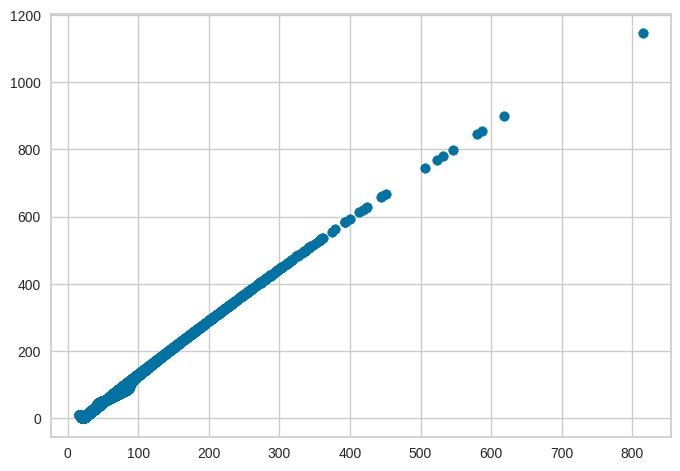

In [6]:
plt.scatter(
    df['Weighted Mean Thickness'],
    abs(df['Weighted Mean Thickness'] - df['Residual Correction'])
)

In [7]:
abs(df['Weighted Mean Thickness'] - df['Residual Correction']).min()

0.0011941007231506262

# Compare with survey thickness

In [8]:
# glac = gl.load_training_data(RGI_input = 'y')
# glac = glac[['RGIId', 'Thickness']]

# df = pd.merge(df, glac, on = 'RGIId', how = 'inner')

# df['Residual'] = df['Weighted Mean Thickness'] - df['Thickness']
# df['F Residual'] = df['Farinotti Mean Thickness'] - df['Thickness']

# df['P Residual'] = (df['Weighted Mean Thickness'] - df['Thickness']) / df['Thickness']
# df['F P Residual'] =(df['Farinotti Mean Thickness'] - df['Thickness']) / df['Thickness']

# df

In [9]:
# mean_residual = np.round(df['Residual'].mean(), 3)
# mean_residual_unc = np.round(df['Residual'].std(), 3)

# mean_residual_f = np.round(df['F Residual'].mean(), 3)
# mean_residual_f_unc = np.round(df['F Residual'].std(), 3)

# print(
#     f'This study mean residual: {mean_residual} +/- {mean_residual_unc} m\n'
#     f'Farinotti mean residual: {mean_residual_f} +/- {mean_residual_f_unc} m'

# )

In [10]:
# plt.scatter(
#     df['Thickness'],
#     df['Residual'],
#     label = 'This Study Residual'
# )
# plt.scatter(
#     df['Thickness'],
#     df['F Residual'],
#     label = 'Farinotti Residual'
# )

# plt.ylabel('Residual (m)')
# plt.xlabel('GlaThiDa Thickness (m)')
# plt.legend()